In [1]:
import pandas as pd
import numpy as np
from datasets import load_dataset

# Loading
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

## Monthly Job Postings for Top Data Jobs in US

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785741 entries, 0 to 785740
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   job_title_short        785741 non-null  object        
 1   job_title              785740 non-null  object        
 2   job_location           784696 non-null  object        
 3   job_via                785733 non-null  object        
 4   job_schedule_type      773074 non-null  object        
 5   job_work_from_home     785741 non-null  bool          
 6   search_location        785741 non-null  object        
 7   job_posted_date        785741 non-null  datetime64[ns]
 8   job_no_degree_mention  785741 non-null  bool          
 9   job_health_insurance   785741 non-null  bool          
 10  job_country            785692 non-null  object        
 11  salary_rate            33067 non-null   object        
 12  salary_year_avg        22003 non-null   floa

In [3]:
df_unique = df.drop_duplicates().copy()
df_unique

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"['r', 'python', 'sql', 'nosql', 'power bi', 't...","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,"['python', 'sql', 'c#', 'azure', 'airflow', 'd...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"['python', 'c++', 'java', 'matlab', 'aws', 'te...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,Sudan,2023-08-07 14:29:36,False,False,Sudan,None,NaN,NaN,Kristina Daniel,"['bash', 'python', 'oracle', 'aws', 'ansible',...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785736,Software Engineer,DevOps Engineer,Singapura,melalui Trabajo.org,Pekerjaan tetap,False,Singapore,2023-03-13 06:16:16,False,False,Singapore,None,NaN,NaN,CAREERSTAR INTERNATIONAL PTE. LTD.,"['bash', 'python', 'perl', 'linux', 'unix', 'k...","{'os': ['linux', 'unix'], 'other': ['kubernete..."
785737,Data Analyst,CRM Data Analyst,"Bad Rodach, Jerman",melalui BeBee Deutschland,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,HABA FAMILYGROUP,"['sas', 'sas', 'sql', 'excel']","{'analyst_tools': ['sas', 'excel'], 'programmi..."
785738,Business Analyst,Commercial Analyst - Start Now,Malaysia,melalui Ricebowl,Pekerjaan tetap,False,Malaysia,2023-03-12 06:32:36,False,False,Malaysia,None,NaN,NaN,Lendlease Corporation,"['powerpoint', 'excel']","{'analyst_tools': ['powerpoint', 'excel']}"
785739,Data Engineer,"Principal Associate, Data Engineer (Remote-Eli...","Newark, New Jersey, Amerika Serikat",melalui Recruit.net,Pekerjaan tetap,False,Sudan,2023-03-12 06:32:15,False,False,Sudan,None,NaN,NaN,Capital One,"['python', 'go', 'nosql', 'sql', 'mongo', 'she...","{'cloud': ['aws', 'snowflake', 'azure', 'redsh..."


In [4]:
df_unique = df_unique.drop_duplicates(['job_title','job_location','job_country']).copy()
df_unique

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"['r', 'python', 'sql', 'nosql', 'power bi', 't...","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,"['python', 'sql', 'c#', 'azure', 'airflow', 'd...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"['python', 'c++', 'java', 'matlab', 'aws', 'te...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,Sudan,2023-08-07 14:29:36,False,False,Sudan,None,NaN,NaN,Kristina Daniel,"['bash', 'python', 'oracle', 'aws', 'ansible',...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785734,Business Analyst,PreSales Engineer,"Almaty, Kazakhstan",melalui Melga,Pekerjaan tetap,False,Kazakhstan,2023-03-12 06:31:13,False,False,Kazakhstan,None,NaN,NaN,Staff-UP Consulting Group,['windows'],{'os': ['windows']}
785737,Data Analyst,CRM Data Analyst,"Bad Rodach, Jerman",melalui BeBee Deutschland,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,HABA FAMILYGROUP,"['sas', 'sas', 'sql', 'excel']","{'analyst_tools': ['sas', 'excel'], 'programmi..."
785738,Business Analyst,Commercial Analyst - Start Now,Malaysia,melalui Ricebowl,Pekerjaan tetap,False,Malaysia,2023-03-12 06:32:36,False,False,Malaysia,None,NaN,NaN,Lendlease Corporation,"['powerpoint', 'excel']","{'analyst_tools': ['powerpoint', 'excel']}"
785739,Data Engineer,"Principal Associate, Data Engineer (Remote-Eli...","Newark, New Jersey, Amerika Serikat",melalui Recruit.net,Pekerjaan tetap,False,Sudan,2023-03-12 06:32:15,False,False,Sudan,None,NaN,NaN,Capital One,"['python', 'go', 'nosql', 'sql', 'mongo', 'she...","{'cloud': ['aws', 'snowflake', 'azure', 'redsh..."


In [5]:
df_unique['job_posted_month'] = pd.to_datetime(df_unique['job_posted_date']).dt.strftime('%B')
df_unique

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None,June
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"['r', 'python', 'sql', 'nosql', 'power bi', 't...","{'analyst_tools': ['power bi', 'tableau'], 'pr...",January
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,"['python', 'sql', 'c#', 'azure', 'airflow', 'd...","{'analyst_tools': ['dax'], 'cloud': ['azure'],...",October
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"['python', 'c++', 'java', 'matlab', 'aws', 'te...","{'cloud': ['aws'], 'libraries': ['tensorflow',...",July
4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,Sudan,2023-08-07 14:29:36,False,False,Sudan,None,NaN,NaN,Kristina Daniel,"['bash', 'python', 'oracle', 'aws', 'ansible',...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl...",August
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785734,Business Analyst,PreSales Engineer,"Almaty, Kazakhstan",melalui Melga,Pekerjaan tetap,False,Kazakhstan,2023-03-12 06:31:13,False,False,Kazakhstan,None,NaN,NaN,Staff-UP Consulting Group,['windows'],{'os': ['windows']},March
785737,Data Analyst,CRM Data Analyst,"Bad Rodach, Jerman",melalui BeBee Deutschland,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,HABA FAMILYGROUP,"['sas', 'sas', 'sql', 'excel']","{'analyst_tools': ['sas', 'excel'], 'programmi...",March
785738,Business Analyst,Commercial Analyst - Start Now,Malaysia,melalui Ricebowl,Pekerjaan tetap,False,Malaysia,2023-03-12 06:32:36,False,False,Malaysia,None,NaN,NaN,Lendlease Corporation,"['powerpoint', 'excel']","{'analyst_tools': ['powerpoint', 'excel']}",March
785739,Data Engineer,"Principal Associate, Data Engineer (Remote-Eli...","Newark, New Jersey, Amerika Serikat",melalui Recruit.net,Pekerjaan tetap,False,Sudan,2023-03-12 06:32:15,False,False,Sudan,None,NaN,NaN,Capital One,"['python', 'go', 'nosql', 'sql', 'mongo', 'she...","{'cloud': ['aws', 'snowflake', 'azure', 'redsh...",March


In [6]:
df_unique = df_unique[df_unique['job_country'] == 'United States']
df_unique

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None,June
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"['python', 'c++', 'java', 'matlab', 'aws', 'te...","{'cloud': ['aws'], 'libraries': ['tensorflow',...",July
5,Data Engineer,GCP Data Engineer,Anywhere,via ZipRecruiter,Contractor and Temp work,True,Georgia,2023-11-07 14:01:59,False,False,United States,None,NaN,NaN,smart folks inc,"['python', 'sql', 'gcp']","{'cloud': ['gcp'], 'programming': ['python', '...",November
6,Senior Data Engineer,Senior Data Engineer - GCP Cloud,"Dearborn, MI",via LinkedIn,Full-time,False,"Florida, United States",2023-03-27 13:18:18,False,False,United States,None,NaN,NaN,"Miracle Software Systems, Inc","['sql', 'python', 'java', 'sql server', 'gcp',...","{'cloud': ['gcp', 'bigquery'], 'databases': ['...",March
9,Data Scientist,Data Scientist II,Anywhere,via ZipRecruiter,Full-time,True,"New York, United States",2023-04-23 13:02:57,False,False,United States,None,NaN,NaN,"Radwell International, LLC","['sql', 'python', 'r', 'mongodb', 'mongodb', '...","{'analyst_tools': ['excel'], 'cloud': ['azure'...",April
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785626,Data Analyst,Data Acquisition Associate,"Tarrytown, NY",via Trabajo.org,Full-time,False,"New York, United States",2023-10-29 06:01:29,False,False,United States,None,NaN,NaN,Planet Group,['microsoft teams'],{'sync': ['microsoft teams']},October
785648,Data Scientist,Director Data Scientist - Commercial Platforms...,"Pleasant Hill, CA",via Ai-Jobs.net,Full-time,False,"California, United States",2023-04-12 06:02:51,False,True,United States,year,221875.0,NaN,84.51°,"['python', 'azure', 'snowflake', 'spark']","{'cloud': ['azure', 'snowflake'], 'libraries':...",April
785651,Data Scientist,Data Scientist (Supply Chain Security),"Fort Belvoir, VA",via LinkedIn,Full-time,False,Georgia,2023-01-07 07:10:51,False,False,United States,None,NaN,NaN,Defense Logistics Agency,['go'],{'programming': ['go']},January
785673,Data Scientist,Asset Management Data Scientist,"New York, NY",via Trabajo.org,Full-time,False,"New York, United States",2023-10-16 06:01:53,True,False,United States,None,NaN,NaN,JPMorgan Chase & Co.,None,None,October


In [7]:
df_pivot = df_unique.pivot_table(index='job_posted_month',columns='job_title_short', aggfunc='size')
df_pivot

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_posted_month,,,,,,,,,,
April,439,38,2878,1386,2158,42,534,368,460,102
August,706,37,3376,1696,2899,58,639,416,741,169
December,503,39,2587,1478,2092,101,427,365,496,194
February,346,23,3099,1502,2365,46,676,457,535,73
January,425,35,4276,1452,3360,56,874,439,729,95
July,457,37,2675,1372,2345,55,486,348,526,129
June,352,28,2807,1459,2179,42,537,382,470,78
March,339,19,3069,1638,2219,48,626,422,547,96
May,221,18,2361,1464,1910,36,452,349,431,83


In [8]:
job_titles = df_unique['job_title_short'].value_counts().sort_values(ascending=False).head(3).index
job_titles

Index(['Data Analyst', 'Data Scientist', 'Data Engineer'], dtype='object', name='job_title_short')

In [9]:
df_pivot.reset_index(inplace=True)
df_pivot

job_title_short,job_posted_month,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
0,April,439,38,2878,1386,2158,42,534,368,460,102
1,August,706,37,3376,1696,2899,58,639,416,741,169
2,December,503,39,2587,1478,2092,101,427,365,496,194
3,February,346,23,3099,1502,2365,46,676,457,535,73
4,January,425,35,4276,1452,3360,56,874,439,729,95
5,July,457,37,2675,1372,2345,55,486,348,526,129
6,June,352,28,2807,1459,2179,42,537,382,470,78
7,March,339,19,3069,1638,2219,48,626,422,547,96
8,May,221,18,2361,1464,1910,36,452,349,431,83
9,November,571,34,2960,1561,2337,115,422,336,502,165


In [10]:
df_pivot['month_no'] = pd.to_datetime(df_pivot['job_posted_month'], format='%B').dt.month
df_pivot

job_title_short,job_posted_month,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer,month_no
0,April,439,38,2878,1386,2158,42,534,368,460,102,4
1,August,706,37,3376,1696,2899,58,639,416,741,169,8
2,December,503,39,2587,1478,2092,101,427,365,496,194,12
3,February,346,23,3099,1502,2365,46,676,457,535,73,2
4,January,425,35,4276,1452,3360,56,874,439,729,95,1
5,July,457,37,2675,1372,2345,55,486,348,526,129,7
6,June,352,28,2807,1459,2179,42,537,382,470,78,6
7,March,339,19,3069,1638,2219,48,626,422,547,96,3
8,May,221,18,2361,1464,1910,36,452,349,431,83,5
9,November,571,34,2960,1561,2337,115,422,336,502,165,11


In [11]:
df_pivot.sort_values(by='month_no',inplace=True)
df_pivot

job_title_short,job_posted_month,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer,month_no
4,January,425,35,4276,1452,3360,56,874,439,729,95,1
3,February,346,23,3099,1502,2365,46,676,457,535,73,2
7,March,339,19,3069,1638,2219,48,626,422,547,96,3
0,April,439,38,2878,1386,2158,42,534,368,460,102,4
8,May,221,18,2361,1464,1910,36,452,349,431,83,5
6,June,352,28,2807,1459,2179,42,537,382,470,78,6
5,July,457,37,2675,1372,2345,55,486,348,526,129,7
1,August,706,37,3376,1696,2899,58,639,416,741,169,8
11,September,721,49,2764,1866,2575,102,511,415,568,206,9
10,October,773,41,3184,1688,2779,79,547,336,533,205,10


In [12]:
df_pivot = df_pivot.set_index('job_posted_month')
df_pivot

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer,month_no
job_posted_month,,,,,,,,,,,
January,425,35,4276,1452,3360,56,874,439,729,95,1
February,346,23,3099,1502,2365,46,676,457,535,73,2
March,339,19,3069,1638,2219,48,626,422,547,96,3
April,439,38,2878,1386,2158,42,534,368,460,102,4
May,221,18,2361,1464,1910,36,452,349,431,83,5
June,352,28,2807,1459,2179,42,537,382,470,78,6
July,457,37,2675,1372,2345,55,486,348,526,129,7
August,706,37,3376,1696,2899,58,639,416,741,169,8
September,721,49,2764,1866,2575,102,511,415,568,206,9


In [13]:
df_final = df_pivot.loc[:,job_titles]
df_final

job_title_short,Data Analyst,Data Scientist,Data Engineer
job_posted_month,,,
January,4276,3360,1452
February,3099,2365,1502
March,3069,2219,1638
April,2878,2158,1386
May,2361,1910,1464
June,2807,2179,1459
July,2675,2345,1372
August,3376,2899,1696
September,2764,2575,1866


<Axes: xlabel='job_posted_month'>

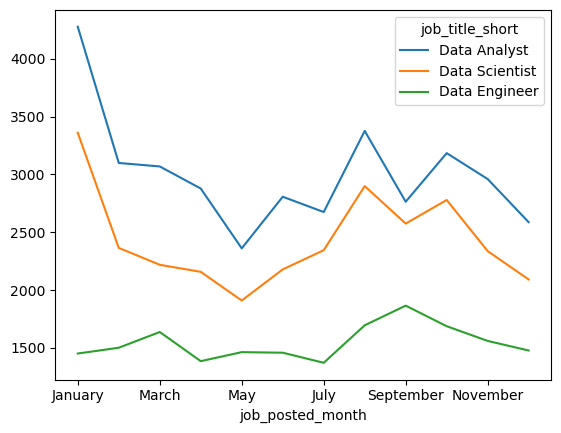

In [14]:
df_final.plot()

In [15]:
pd.read_csv("https://lukeb.co/software_csv")

,job_posted_month,Front-End Developer,Back-End Developer,Full-Stack Developer,UI/UX Designer
0,January,13619,9827,5108,4348
1,February,11456,9116,7298,4284
2,March,11102,8178,5814,4159
3,April,14037,9209,7232,4220
4,May,12126,8864,6718,4980
5,June,12003,8065,5902,4781
6,July,11914,8061,6839,4344
7,August,11571,8191,7413,4104
8,September,14016,8447,6139,4094
9,October,11419,8476,5026,4389


In [17]:
df_software = pd.read_csv("https://lukeb.co/software_csv", index_col='job_posted_month')

In [19]:
df_merged = df_final.merge(df_software, on='job_posted_month')

In [20]:
df_merged

,Data Analyst,Data Scientist,Data Engineer,Front-End Developer,Back-End Developer,Full-Stack Developer,UI/UX Designer
job_posted_month,,,,,,,
January,4276,3360,1452,13619,9827,5108,4348
February,3099,2365,1502,11456,9116,7298,4284
March,3069,2219,1638,11102,8178,5814,4159
April,2878,2158,1386,14037,9209,7232,4220
May,2361,1910,1464,12126,8864,6718,4980
June,2807,2179,1459,12003,8065,5902,4781
July,2675,2345,1372,11914,8061,6839,4344
August,3376,2899,1696,11571,8191,7413,4104
September,2764,2575,1866,14016,8447,6139,4094


In [27]:
top_5 = df_merged.sum().sort_values(ascending=False).head(5).index.to_list()

top_5

['Front-End Developer',
 'Back-End Developer',
 'Full-Stack Developer',
 'UI/UX Designer',
 'Data Analyst']

<Axes: xlabel='job_posted_month'>

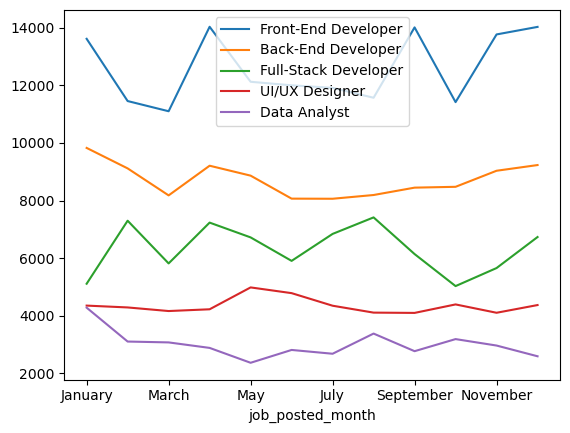

In [29]:
df_merged[top_5].plot()